# **Saudi Arabia Used Car Price Prediction with Machine Learning**

## **Contents**

1. Business Problem Understanding 
2. Data Understanding, Data Cleaning, and Features Selection
3. Data Preprocessing and Modeling
4. Conclusion and Recommendation

## **2. Data Understanding, Data Cleaning, and Features Selection**

In [1]:
# Import libraries needed for data understanding and data cleaning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set display option for maximum column width
pd.set_option('display.max_colwidth', None)

### **Load Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('../data/data_saudi_used_cars_raw.csv')

# Display the DataFrame
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


### **a. Data Understanding**

In [3]:
# Display the DataFrame
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


Dataset contains records of used cars collected from syarah.com, representing vehicles available for sale in Saudi Arabia. Each row provides detailed information about a specific used car, including its features and price.

| **Attribute**        | **Description**                                                    | **Data Type**   | **Values**                           |
|----------------------|--------------------------------------------------------------------|------------------|--------------------------------------|
| Type                 | Type of used car                                                   | String           | 2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5008, 6, 911, A, A3, A4, A5, A6, A7, A8, APV, ASX, ATS, Abeka, Acadia, Accent, Accord, Altima, Armada, Attrage, Aurion, Avalanche, Avalon, Avante, Avanza, Aveo, Azera, Azkarra, B50, BT-50, Beetle, Bentayga, Blazer, Bora, Boxer, Bronco, Bus County, Bus Urvan, C, C200, C300, C5700, CC, CL, CLA, CLS, CRV, CS35, CS35 Plus, CS75, CS85, CS95, CT-S, CT4, CT5, CT6, CX3, CX5, CX7, CX9, Cadenza, Cadillac, Camargue, Camaro, Camry, Caprice, Capture, Carens, Carenz, Carnival, Cayenne, Cayenne S, Cayenne Turbo, Cayenne Turbo S, Cayman, Centennial, Cerato, Challenger, Charger, Cherokee, Ciocca, City, Civic, Coaster, Colorado, Compass, Coolray, Copper, Cores, Corolla, Corolla Cross, Countryman, Coupe, Coupe S, Cressida, Creta, Crown, Cruze, "Dmax", D-MAX, DB9, DTS, Daily, Dakota, Datsun, Defender, Delta, Discovery, Doblo, Dokker, Durango, Duster, Dyna, Dzire, E, EC7, EC8, ES, Eado, Echo, Echo Sport, Edge, Elantra, Emgrand, Envoy, Ertiga, Escalade, Expedition, Explorer, F Type, F-Pace, F150, F3, FJ, FX, Fleetwood, Flex, Fluence, Flying Spur, Focus, Furniture, Fusion, G, G70, G80, GC7, GL, GLC, GLE, GS, GS3, GTB 599 Fiorano, GX, Genesis, Ghost, Golf, Gran Max, Grand Cherokee, Grand Marquis, Grand Vitara, H1, H100, H2, H3, H6, H9, HRV, HS, Hiace, Hilux, IS, Impala, Innova, Jetta, Jimny, Juke, K5, KICKS, Kaptiva, Koleos, Kona, Koranado, L200, L300, LF X60, LS, LX, Lancer, Land Cruiser, Land Cruiser 70, Land Cruiser Pickup, Levante, Liberty, Logan, Lumina, M, MKS, MKX, MKZ, ML, Macan, Malibu, Marquis, Maxima, Maybach, Megane, Milan, Mini Van, Mohave, Montero, Montero2, Murano, Mustang, NX, Nativa, Navara, Navigator, New Yorker, Nexon, Nitro, Odyssey, Opirus, Optima, Optra, Outlander, POS24, Pajero, Panamera, Passat, Pathfinder, Patrol, Pegas, Picanto, Pick up, Pilot, Platinum, Power, Prado, Prestige, Prestige Plus, Previa, Prius, Q, Q5, Q7, QX, Quattroporte, RC, RX, RX5, RX8, Ram, Range Rover, Ranger, Rav4, Rio, Royal, Rush, S, S300, S5, S8, SEL, SL, SLK, SRT, SRX, Safari, Safrane, Savana, Sedona, Seltos, Senta fe, Sentra, Seven, Sierra, Silverado, Sonata, Sorento, Soul, Spark, Sportage, Stinger, Suburban, Sunny, Superb, Suvana, Sylvian Bus, Symbol, Tahoe, Taurus, Terios, Terrain, The 3, The 4, The 5, The 6, The 7, The M, Thunderbird, Tiggo, Tiguan, Touareg, Town Car, Trailblazer, Traverse, Tucson, Tuscani, UX, V7, VTC, Van, Van R, Vanquish, Vego, Veloster, Viano, Victoria, Vitara, Wingle, Wrangler, X, X-Terra, X-Trail, X40, X7, XF, XJ, XT5, Yaris, Yukon, Z, Z350, Z370, ZS, i40, ACTIS V80, Other (choices not included in specified categories) |
| Region               | The region where the car was offered for sale                      | String           | Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, Al-Namas, Arar, Aseer, Besha, Dammam, Hafar Al-Batin, Hail, Jazan, Jeddah, Jubail, Khobar, Makkah, Najran, Qassim, Qurayyat, Riyadh, Sabya, Sakaka, Tabouk, Taef, Wadi Dawasir, Yanbu                      |
| Make                 | Car manufacturer                                                   | String           | Aston Martin, Audi, BMW, BYD, Bentley, Cadillac, Changan, Chery, Chevrolet, Chrysler, Classic, Daihatsu, Dodge, FAW, Ferrari, Fiat, Ford, Foton, GAC, GMC, Geely, Genesis, Great Wall, HAVAL, Honda, Hummer, Hyundai, INFINITI, Isuzu, Iveco, Jaguar, Jeep, Kia, Land Rover, Lexus, Lifan, Lincoln, MG, MINI, Maserati, Mazda, Mercedes, Mercury, Mitsubishi, Nissan, Peugeot, Porsche, Renault, Rolls-Royce, SsangYong, Suzuki, Tata, Toyota, Victory Auto, Volkswagen, Zhengzhou, Škoda, Other (choices not included in specified categories)                |
| Gear_Type            | Gear type (manual or automatic)                                    | String           | Manual, Automatic                    |
| Origin               | Country of origin of the car                                       | String           | Gulf Arabic, Saudi, Other (choices not included in specified categories), Unknown (information that is not known or recorded)  |
| Options              | Features and options available for the car                         | String           | Standard (offering basic features like air conditioning and a radio), Semi Full (offering added features such as alloy wheels and an infotainment system), Full (combining all standard features with enhanced comfort and safety options like a sunroof and a rearview camera)                      |
| Year                 | Year the car was manufactured                                      | Integer          | 1963 - 2022                        |
| Engine_Size          | Engine capacity (size in liters)                                   | String           | 1 - 9                              |
| Mileage              | Number of kilometers the car has been driven                       | Integer          | 100 - 20.000.000                    |
| Negotiable           | Indicates if the price is negotiable (True) or not (False)         | Boolean          | True, False                         |
| Price                | Price of the car (in local currency SAR)                          | Float            | 0 - 850.000                         |


#### **Data Summary**

Understanding the structure and content of the dataset is essential. A thorough examination allows us to identify key attributes, such as data types, missing values, and unique entries, which can significantly impact our work. By gaining insights into these aspects, we can better strategize our approach to data cleaning, ensuring that we address any inconsistencies or gaps. This foundational knowledge enhances the quality of our results and supports informed decision-making in subsequent steps.

This section describes a summary of the data that includes information related to the structure of the dataset, such as column names, data types, and descriptions of the values ​​contained in each column. In addition, this section also presents descriptive statistics, such as the mean, median, and range, to provide a deeper picture of the distribution and characteristics of the data. With this analysis, we can understand the context and quality of the information available, which is very important for decision making and further analysis.

In [4]:
# Create the info DataFrame
info = pd.DataFrame({
    'type' : df.dtypes,
    'nan' : df.isna().sum(),
    'unique' : df.nunique(),
    'unique value' : df.apply(lambda x: x.unique())
    })

# Display the info DataFrame
info

,type,nan,unique,unique value
Type,object,0,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
Region,object,0,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
Make,object,0,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
Gear_Type,object,0,2,"[Manual, Automatic]"
Origin,object,0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
Options,object,0,3,"[Standard, Full, Semi Full]"
Year,int64,0,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
Engine_Size,float64,0,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
Mileage,int64,0,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
Negotiable,bool,0,2,"[True, False]"


In [5]:
# Display the unique values from the 'Type' column
df['Type'].unique()

array(['Corolla', 'Yukon', 'Range Rover', 'Optima', 'FJ', 'CX3',
       'Cayenne S', 'Sonata', 'Avalon', 'LS', 'C300', 'Land Cruiser',
       'Hilux', 'Tucson', 'Caprice', 'Sunny', 'Pajero', 'Azera', 'Focus',
       '5', 'Spark', 'Camry', 'Pathfinder', 'Accent', 'ML', 'Tahoe',
       'Yaris', 'Suburban', 'A', 'Altima', 'Traverse', 'Expedition',
       'Senta fe', 'Liberty', '3', 'X', 'Elantra', 'Land Cruiser Pickup',
       'VTC', 'Malibu', 'The 5', 'A8', 'Patrol', 'Grand Cherokee', 'SL',
       'Previa', 'SEL', 'Aveo', 'MKZ', 'Victoria', 'Datsun', 'Flex',
       'GLC', 'ES', 'Edge', '6', 'Escalade', 'Innova', 'Navara', 'H1',
       'G80', 'Carnival', 'Symbol', 'Camaro', 'Accord', 'Avanza',
       'Land Cruiser 70', 'Taurus', 'C5700', 'Impala', 'Optra', 'S',
       'Other', 'Cerato', 'Furniture', 'Murano', 'Explorer', 'LX',
       'Pick up', 'Charger', 'H6', 'BT-50', 'Hiace', 'Ranger', 'Fusion',
       'Rav4', 'Ciocca', 'CX9', 'Kona', 'Sentra', 'Sierra', 'Durango',
       'CT-S', 'Sylv

In [6]:
# Display the sorted unique values from the 'Price' column
np.sort(df['Price'].unique())

array([     0,      1,    500,    850,    884,    950,    988,    993,
         1000,   1002,   1010,   1046,   1086,   1128,   1139,   1156,
         1197,   1200,   1221,   1262,   1300,   1310,   1313,   1324,
         1325,   1342,   1368,   1414,   1430,   1440,   1500,   1519,
         1550,   1576,   1595,   1625,   1630,   1670,   1700,   1723,
         1800,   1846,   1872,   1959,   2000,   2049,   2069,   2122,
         2141,   2191,   2300,   2314,   2333,   2402,   2450,   2560,
         2665,   2690,   2820,   3000,   3100,   4000,   4500,   5000,
         5500,   6000,   6500,   7000,   7500,   8000,   9000,   9500,
        10000,  10500,  11000,  11500,  12000,  12500,  13000,  13500,
        14000,  14250,  14500,  15000,  16000,  16500,  17000,  17500,
        18000,  18500,  19000,  19500,  20000,  21000,  21500,  22000,
        22500,  23000,  23500,  23900,  24000,  24500,  25000,  25500,
        26000,  26500,  26800,  27000,  27499,  27500,  28000,  28500,
      

In [7]:
# Get the shape of the DataFrame
df.shape

(5624, 11)

Before analyzing the dataset, it's essential to identify and address any duplicate rows, as they can skew results and lead to inaccurate insights.

In [8]:
# Get the number of duplicate rows
df.duplicated().sum()

np.int64(4)

To gain deeper insights into the dataset, it is important to examine descriptive statistics for both categorical and numerical columns.

In [9]:
# Get descriptive statistics for object columns
df.describe(include='object')

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


In [10]:
# Get descriptive statistics for numerical columns
df.describe().round(1)

,Year,Engine_Size,Mileage,Price
count,5624.0,5624.0,5624.0,5624.0
mean,2014.1,3.3,150923.4,53074.1
std,5.8,1.5,382836.0,70155.3
min,1963.0,1.0,100.0,0.0
25%,2012.0,2.0,38000.0,0.0
50%,2016.0,3.0,103000.0,36500.0
75%,2018.0,4.5,196000.0,72932.5
max,2022.0,9.0,20000000.0,850000.0


**Analysis Results:**

- The dataset consists of 5624 rows and 11 columns. There are no missing values ​​in this data set, but there are 4 duplicate rows in this data set.

- The data type for each column is appropriate. According to the data type, the columns in the data are grouped as follows:

  - Object type, which includes 6 columns: Type, Region, Brand, Gear_Type, Origin, and Option.

  - Integer type, which includes 3 columns: Year, Mileage, and Price.

  - Float type, which includes 1 column: Engine_Size.

  - Boolean type, which includes 1 column: Negotiable.

- The range between the latest and oldest car years is very large, indicating a significant difference in vehicle age. This information needs to be examined further to understand its impact on data quality and relevance in modeling.

- The maximum mileage value of 20,000,000 km is very large and needs to be reviewed. This figure could indicate errors in measurement or data recording, which could affect the analysis and models to be built.

- The engine size value of 9 liters is quite high. This related information needs to be examined.

- In the Price column, 0 SAR and 1 SAR are unreasonable prices for cars. This price is too cheap for a car. This related information needs to be examined.

#### **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is an important step to understand the dataset. In this analysis, we will focus on the numeric and categorical columns to explore their relationship with the price column. By analyzing these elements, we can identify factors that influence price, understand distribution patterns, and find potential outliers.

##### **Numerical Columns**

**Data Distribution**

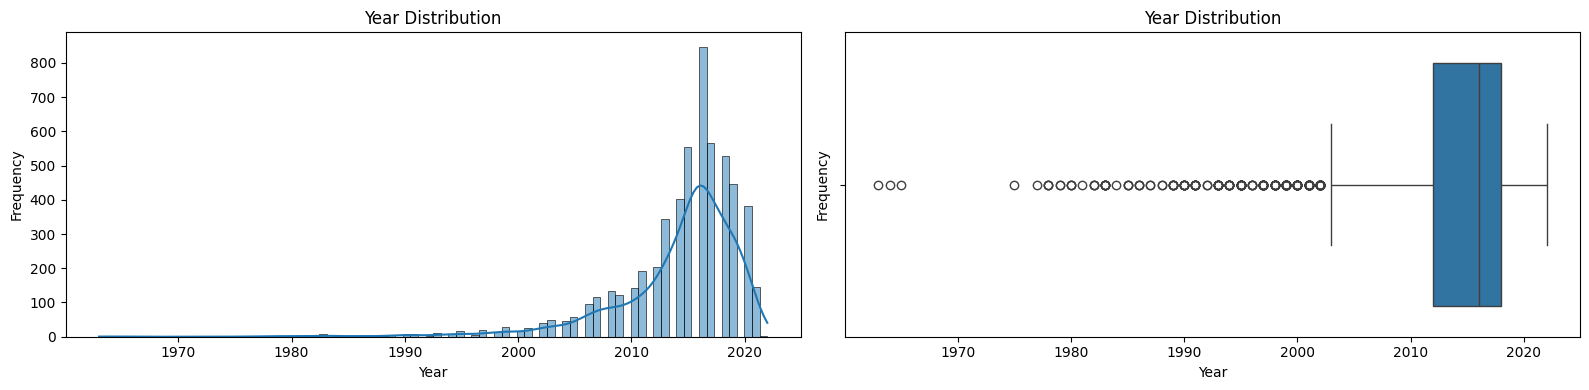

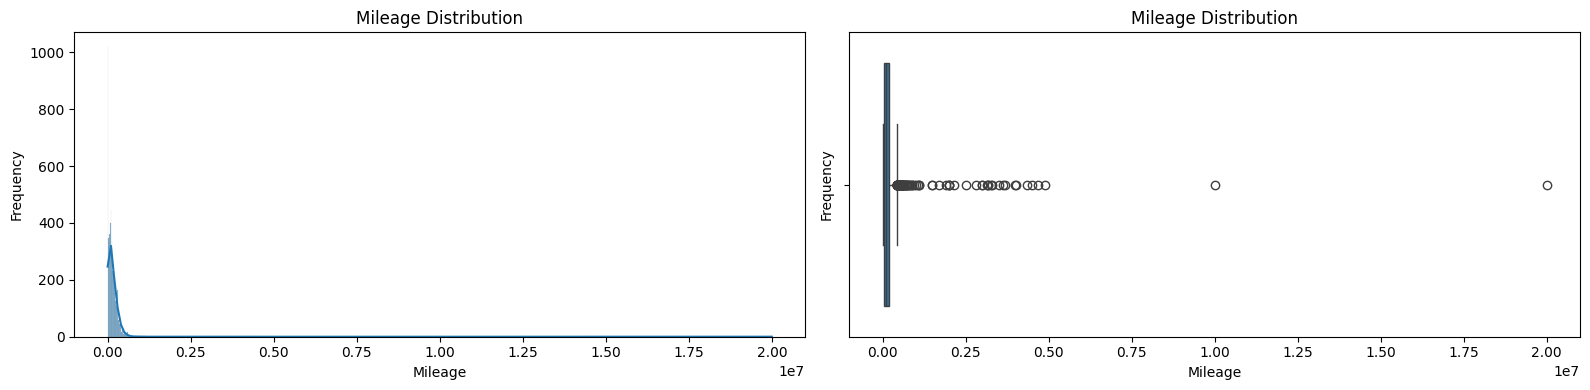

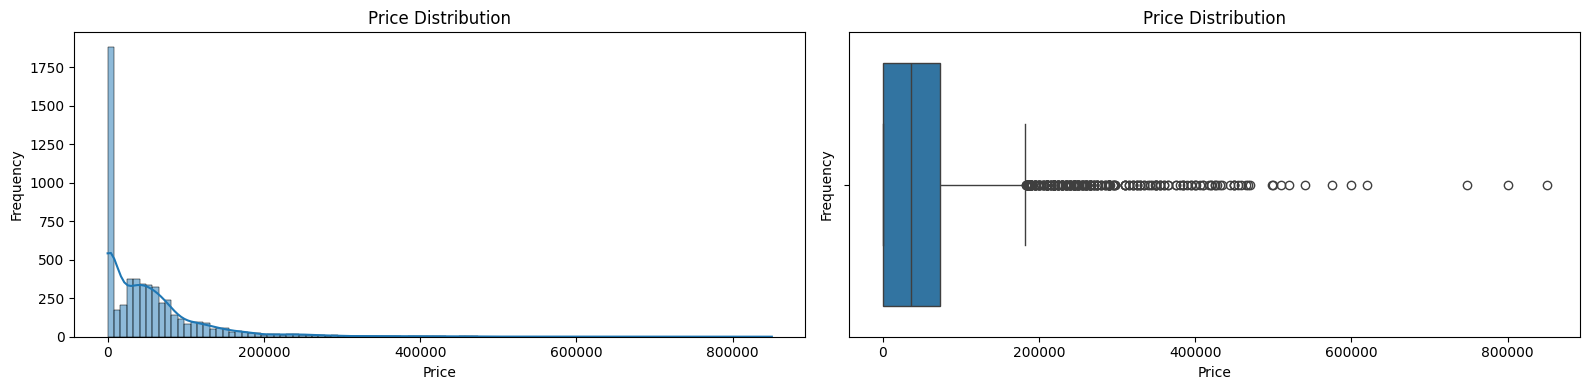

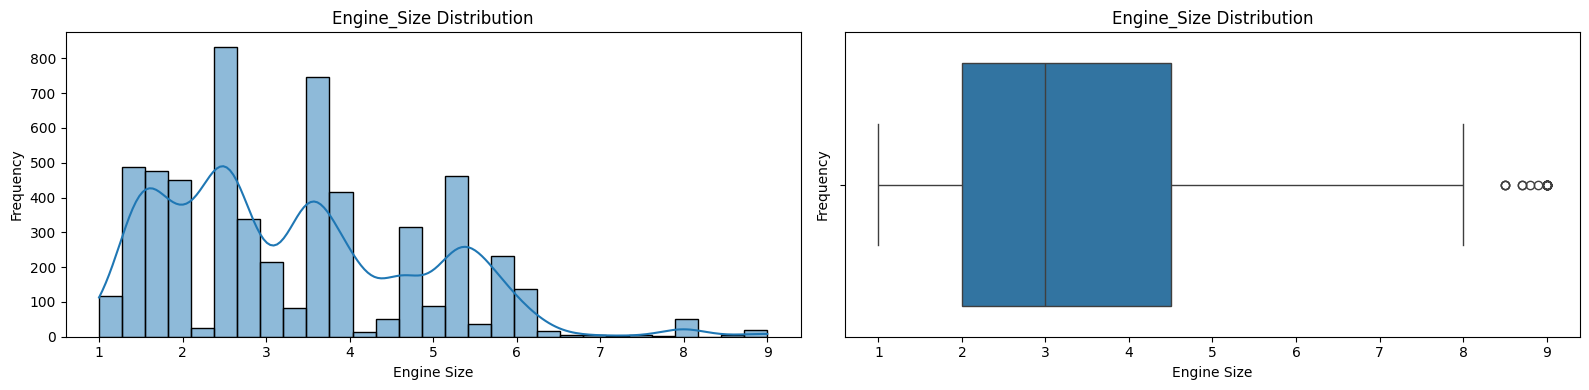

In [11]:
# List of numerical columns to visualize
columns_num = ['Year', 'Mileage', 'Price', 'Engine_Size']

# Titles for the visualizations
viz_title = [
    'Year Distribution',
    'Mileage Distribution',
    'Price Distribution',
    'Engine_Size Distribution',
    ]

# Iterate over each column and its corresponding title
for i, column in enumerate(columns_num):
    plt.figure(figsize=(16, 4)) # Set figure size

    # Create a subplot for histogram and KDE
    plt.subplot(1, 2, 1)
    plt.title(viz_title[i])
    sns.histplot(df[column], kde=True)  # Histogram with KDE
    plt.xlabel(columns_num[i].replace('_', ' '))  # Replace underscores with spaces in labels
    plt.ylabel('Frequency')

    # Create a subplot for box plot
    plt.subplot(1, 2, 2)
    plt.title(viz_title[i])
    sns.boxplot(x=df[column])  # Box plot
    plt.xlabel(columns_num[i].replace('_', ' '))  # Replace underscores with spaces in labels
    plt.ylabel('Frequency')

    # Display the plots
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

**Analysis Results:**

- The data distribution in the Year column is left-skewed. This column contains potential outliers with extreme values, specifically those less than 1970.

- The data distribution in the Mileage column is right-skewed. This column contains potential outliers with extreme values, particularly those exceeding 10,000,000 km.

- The data distribution in the Price column is right-skewed. This column contains potential outliers with extreme values, specifically those greater than 590,000 SAR.

- The data distribution in the Price column exhibits an abnormal distribution, indicating the presence of potential outliers.

**Relationship between Numerical Columns**

Understanding the relationship patterns between columns in the data is essential to uncovering useful insights. Through correlation analysis, we can assess the strength and direction of the relationship between variables, while scatterplots offer clear visualizations to see distribution patterns.

Based on the previous exploration, all numeric columns are not normally distributed. To see the relationship between columns, we will use the Spearman correlation test. This test is suitable because it does not require the assumption of a normal distribution.

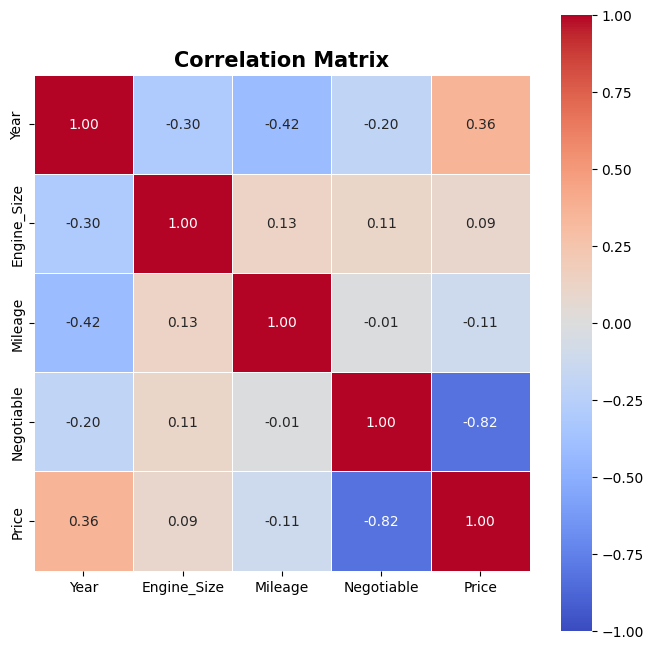

In [12]:
# Display Correlation Matrix

# Create a figure
plt.figure(figsize=(8, 8))

# Compute the correlation matrix
# Spearman's Rank Correlation is used because the data is not normally distributed and contains outliers.
corr = df.corr(method='spearman', numeric_only=True)

# Plot the heatmap
sns.heatmap(
    corr, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    square=True, 
    linewidths=.5, 
    center=0,
    vmin=-1
    )

# Add a title
plt.title('Correlation Matrix', size=15, weight='bold')

# Show the plot
plt.show()

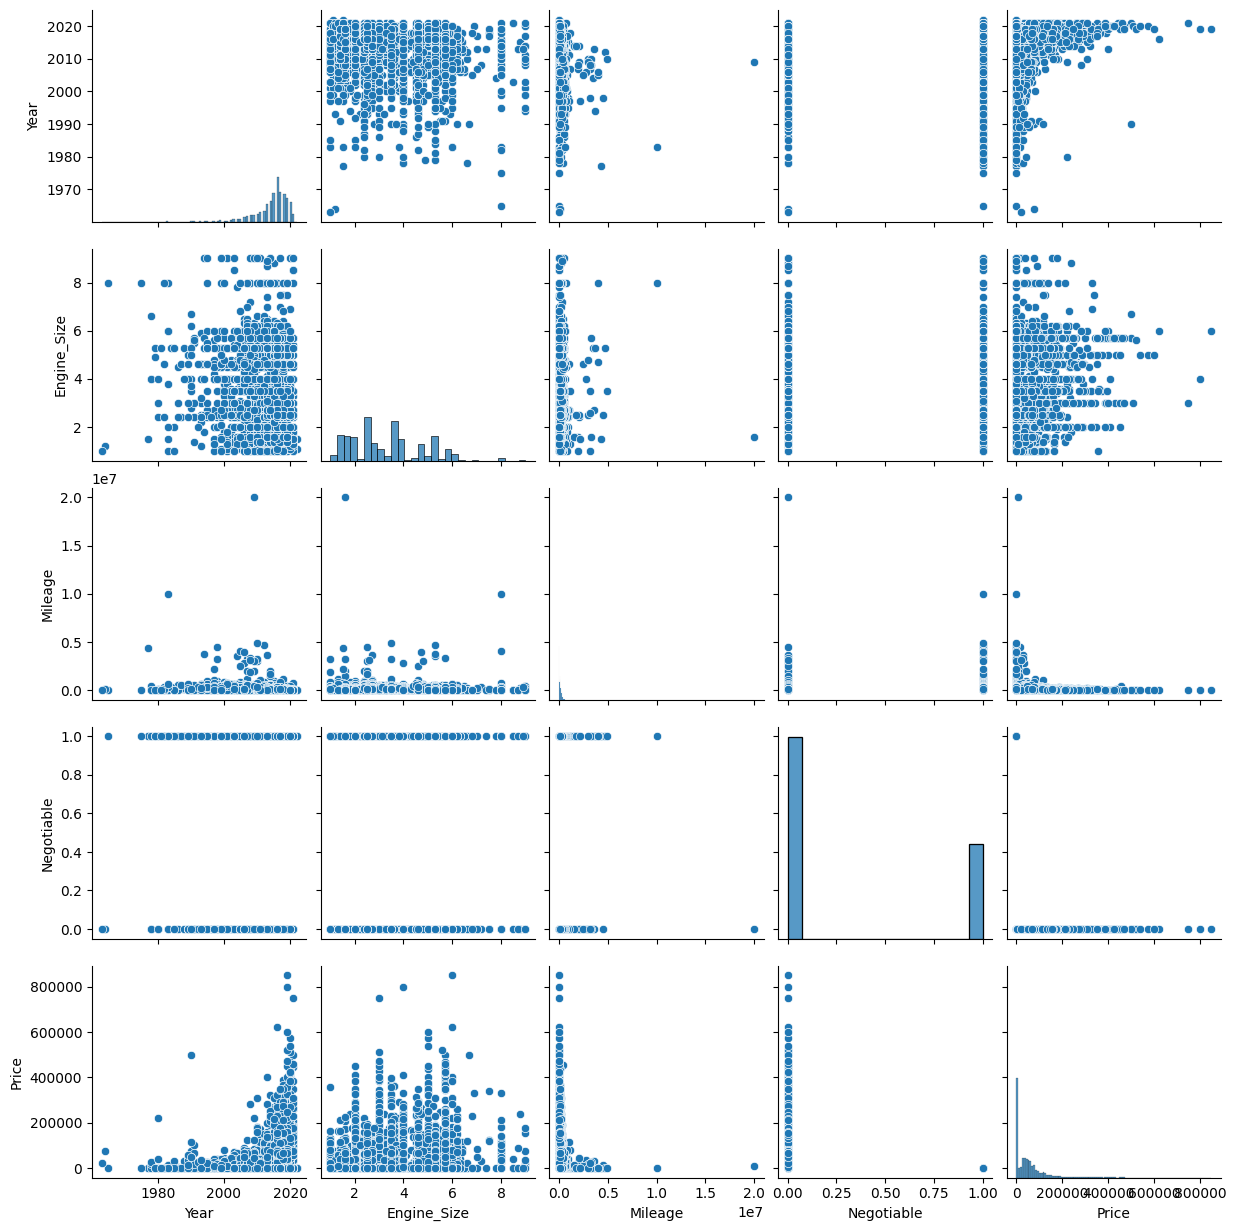

In [13]:
sns.pairplot(df)

plt.show()

**Analysis Results:**

- The correlation matrix shows that the Negotiable column has a strong correlation with the Price column. The relationship between Negotiable and Price is a strong negative correlation. A negative correlation means that the Price value tends to be higher when the Negotiable value is lower. Note that the Negotiable column only takes values of 0 or 1. This means that the price of the car will be lower if the car is negotiable. In this dataset, this happens because the negotiable car price is always 0.

- In addition, the relationship of numeric columns other than Negotiable with Price is weak or very weak.


##### **Categorical Columns**

**Impact of Categorical Variables on Used Car Prices**

Understanding the impact of categorical variables on prices is crucial, especially in developing predictive models. Given that price data often does not follow a normal distribution, using the median as a measure of central tendency is more relevant than using the mean. By analyzing the median used car prices by category, we can more accurately assess the influence of each category, thereby enhancing the accuracy and reliability of the models developed.

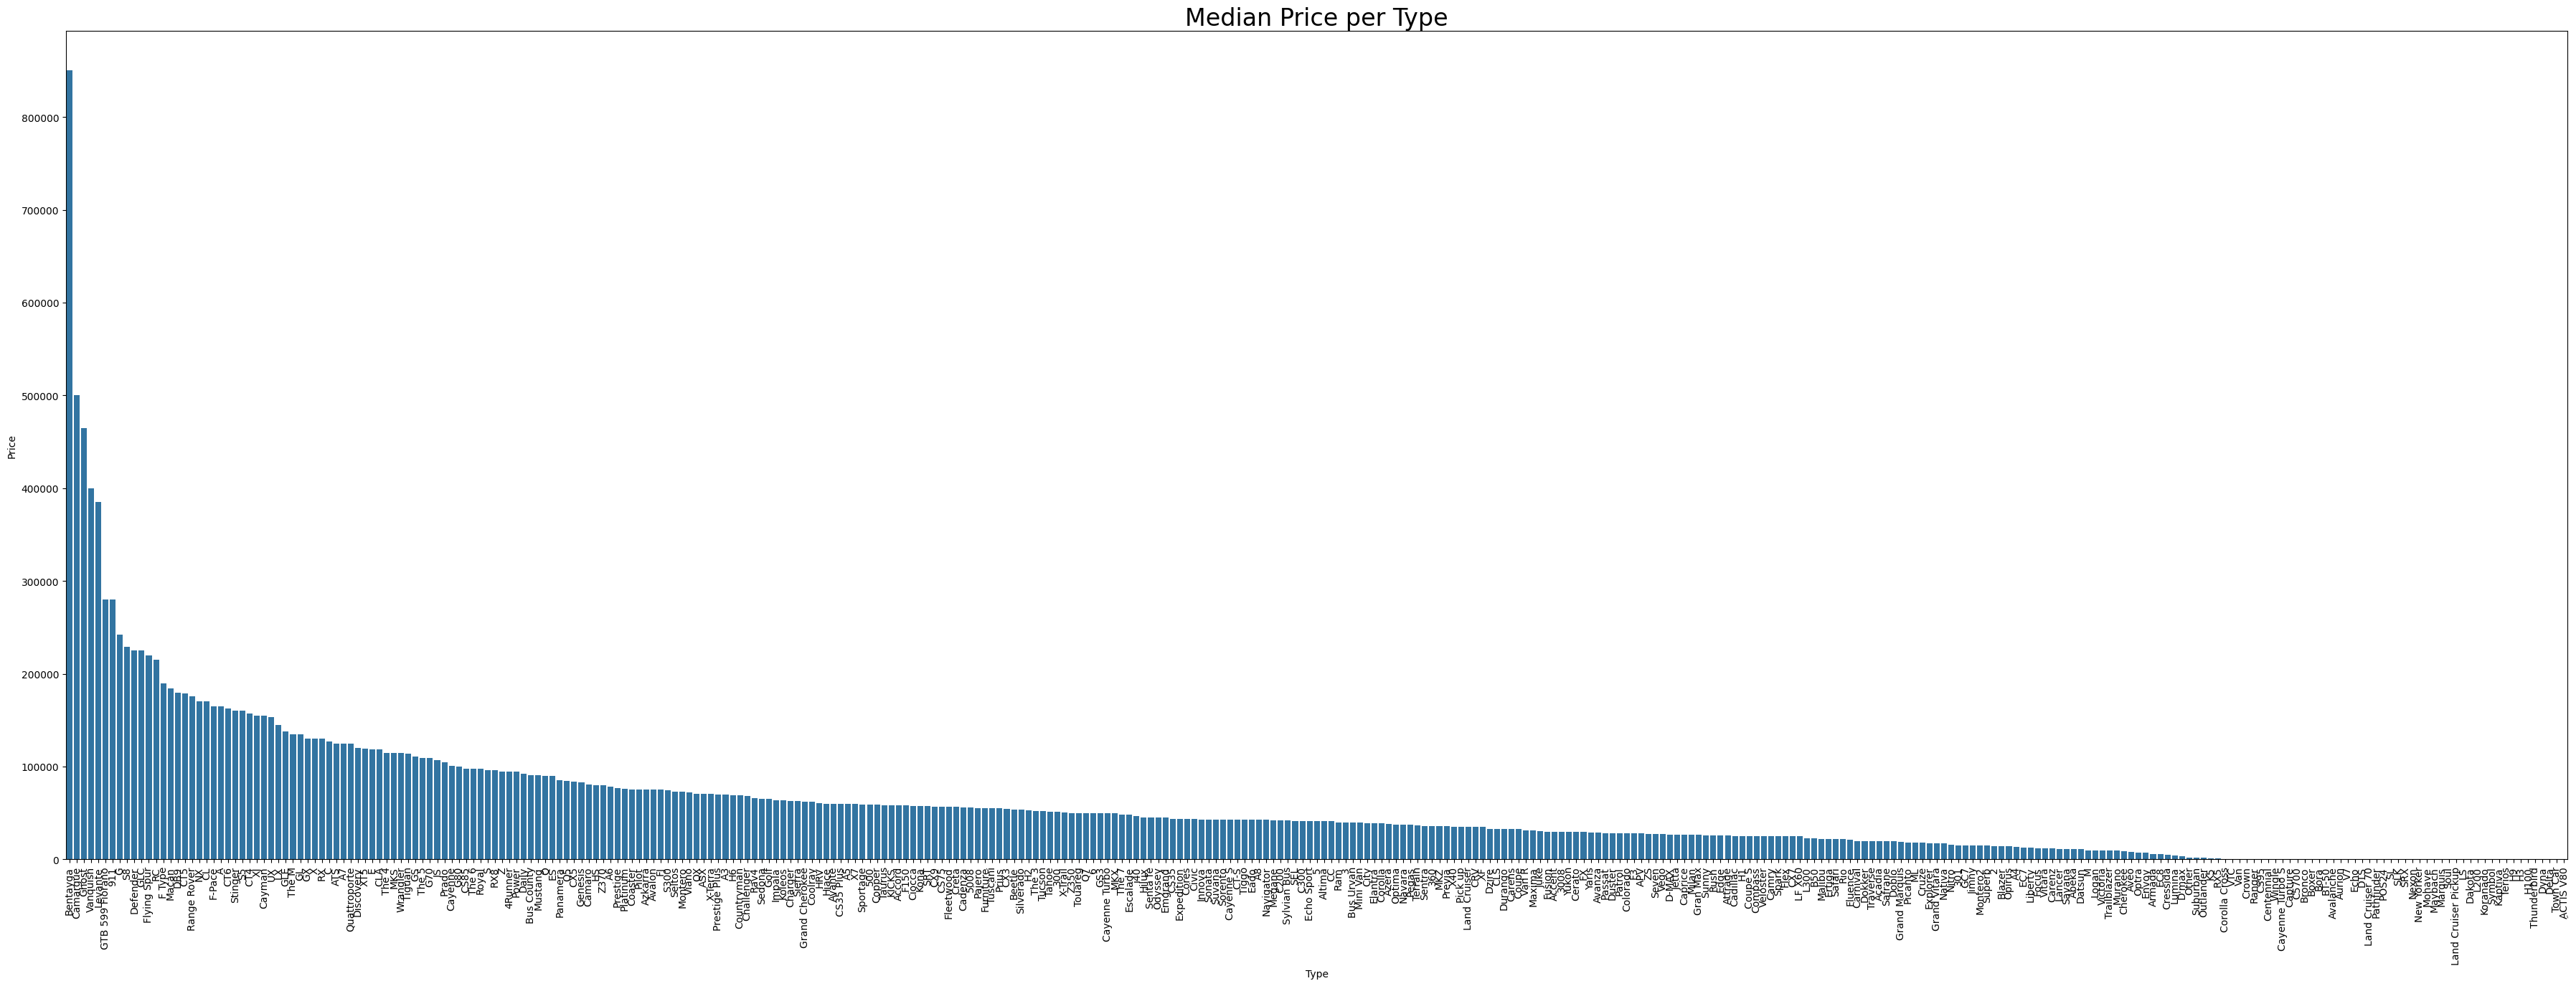

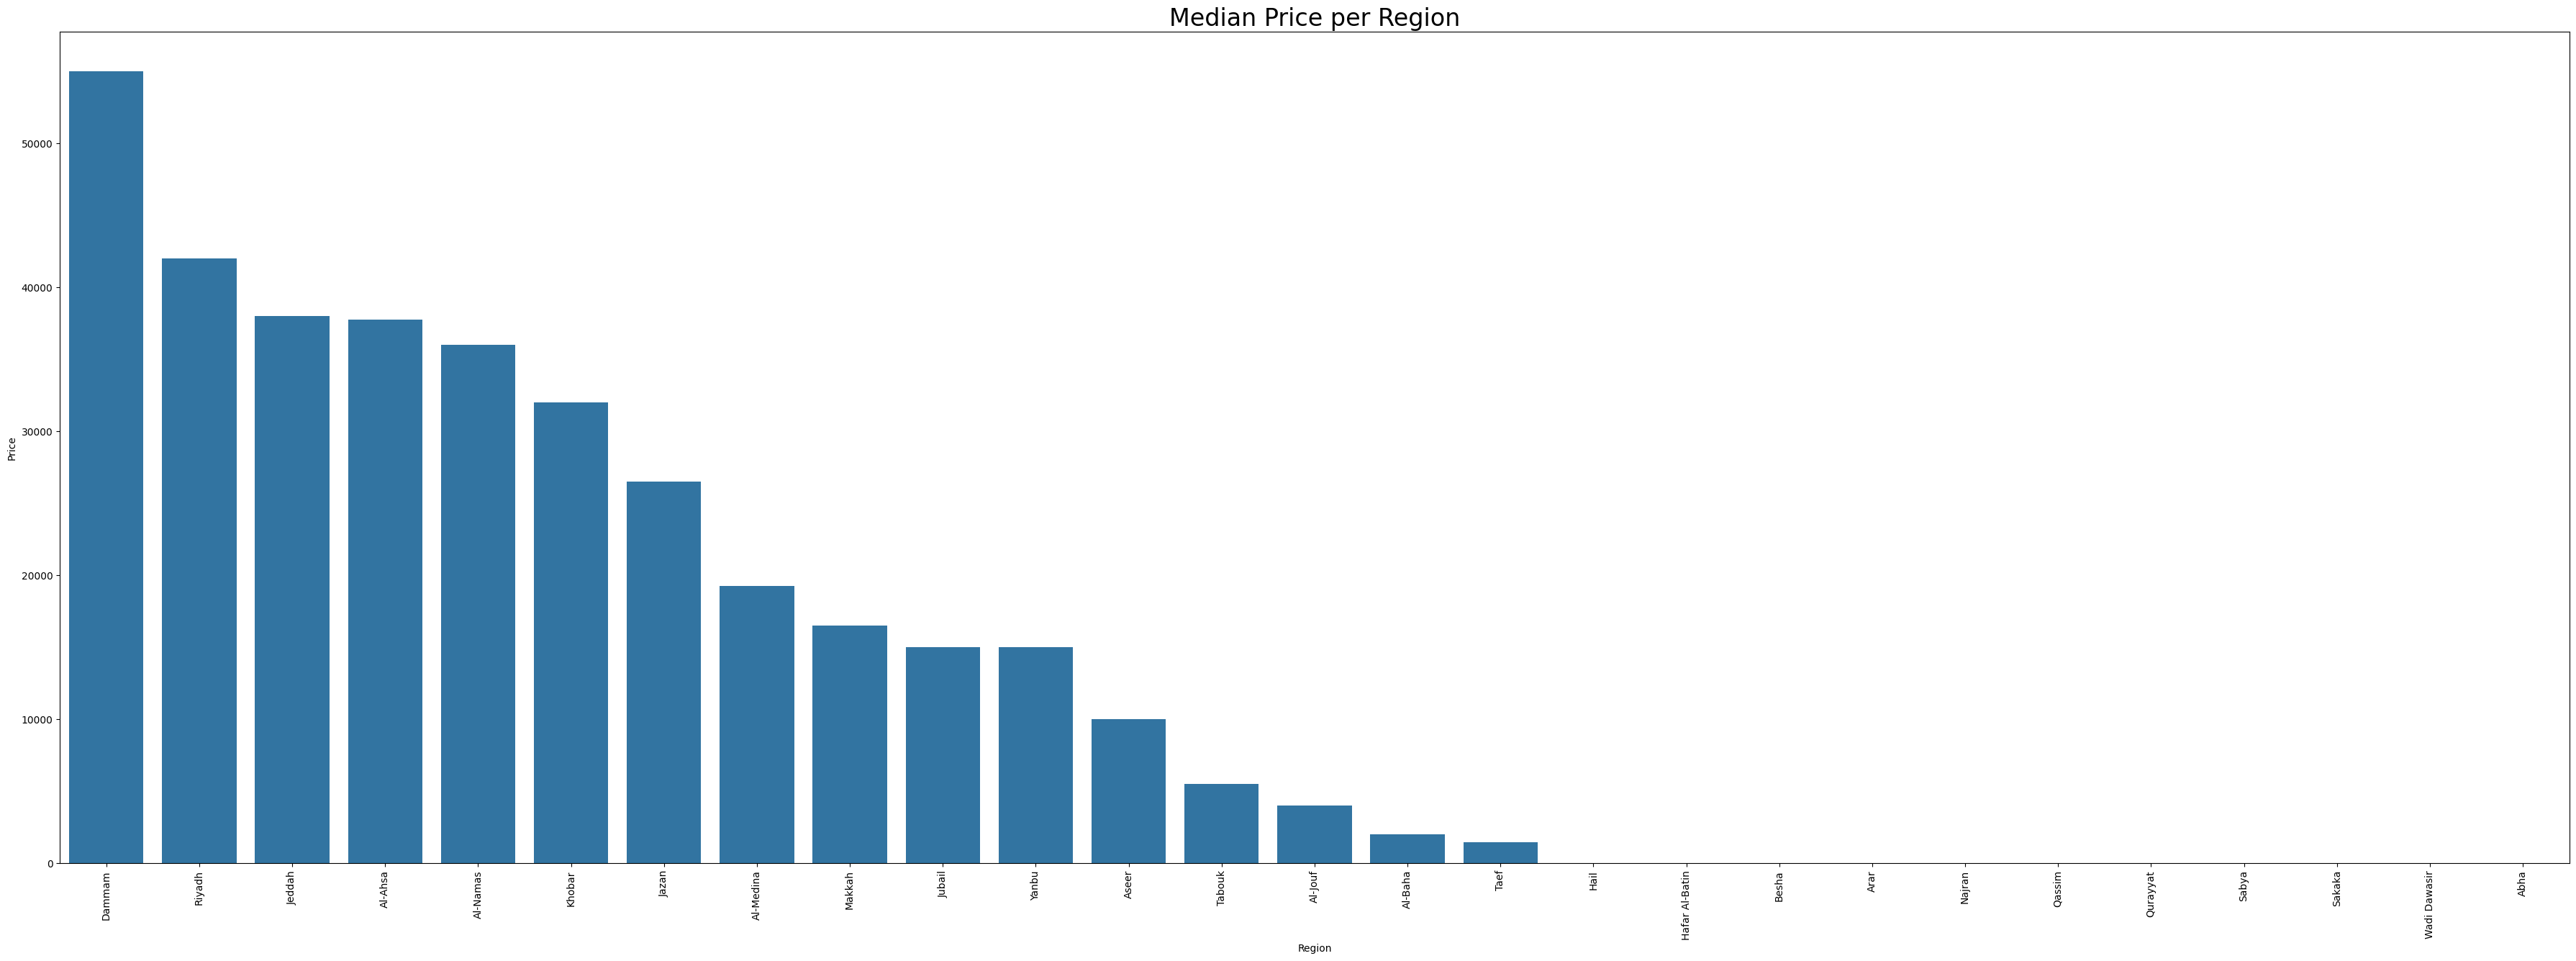

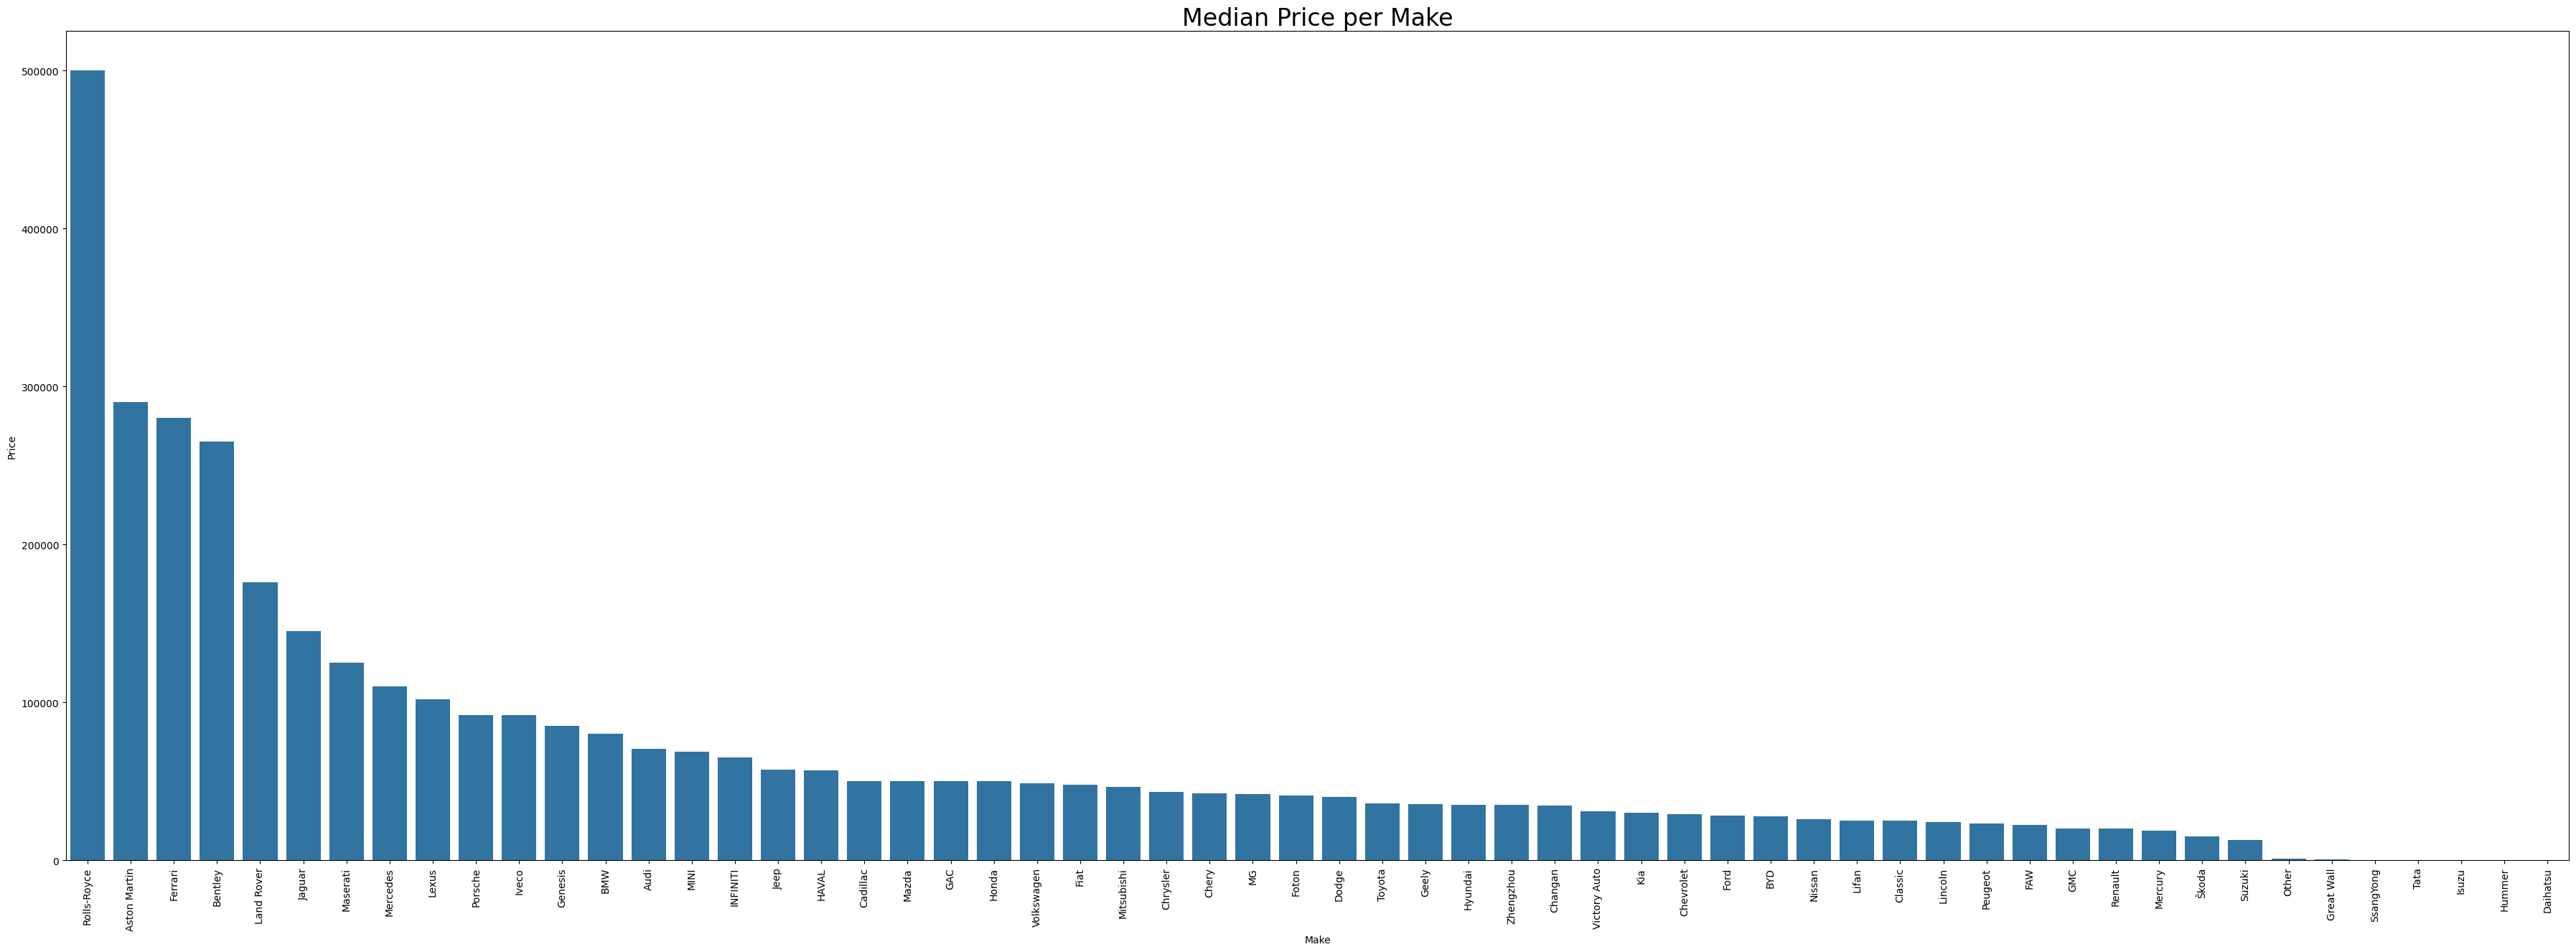

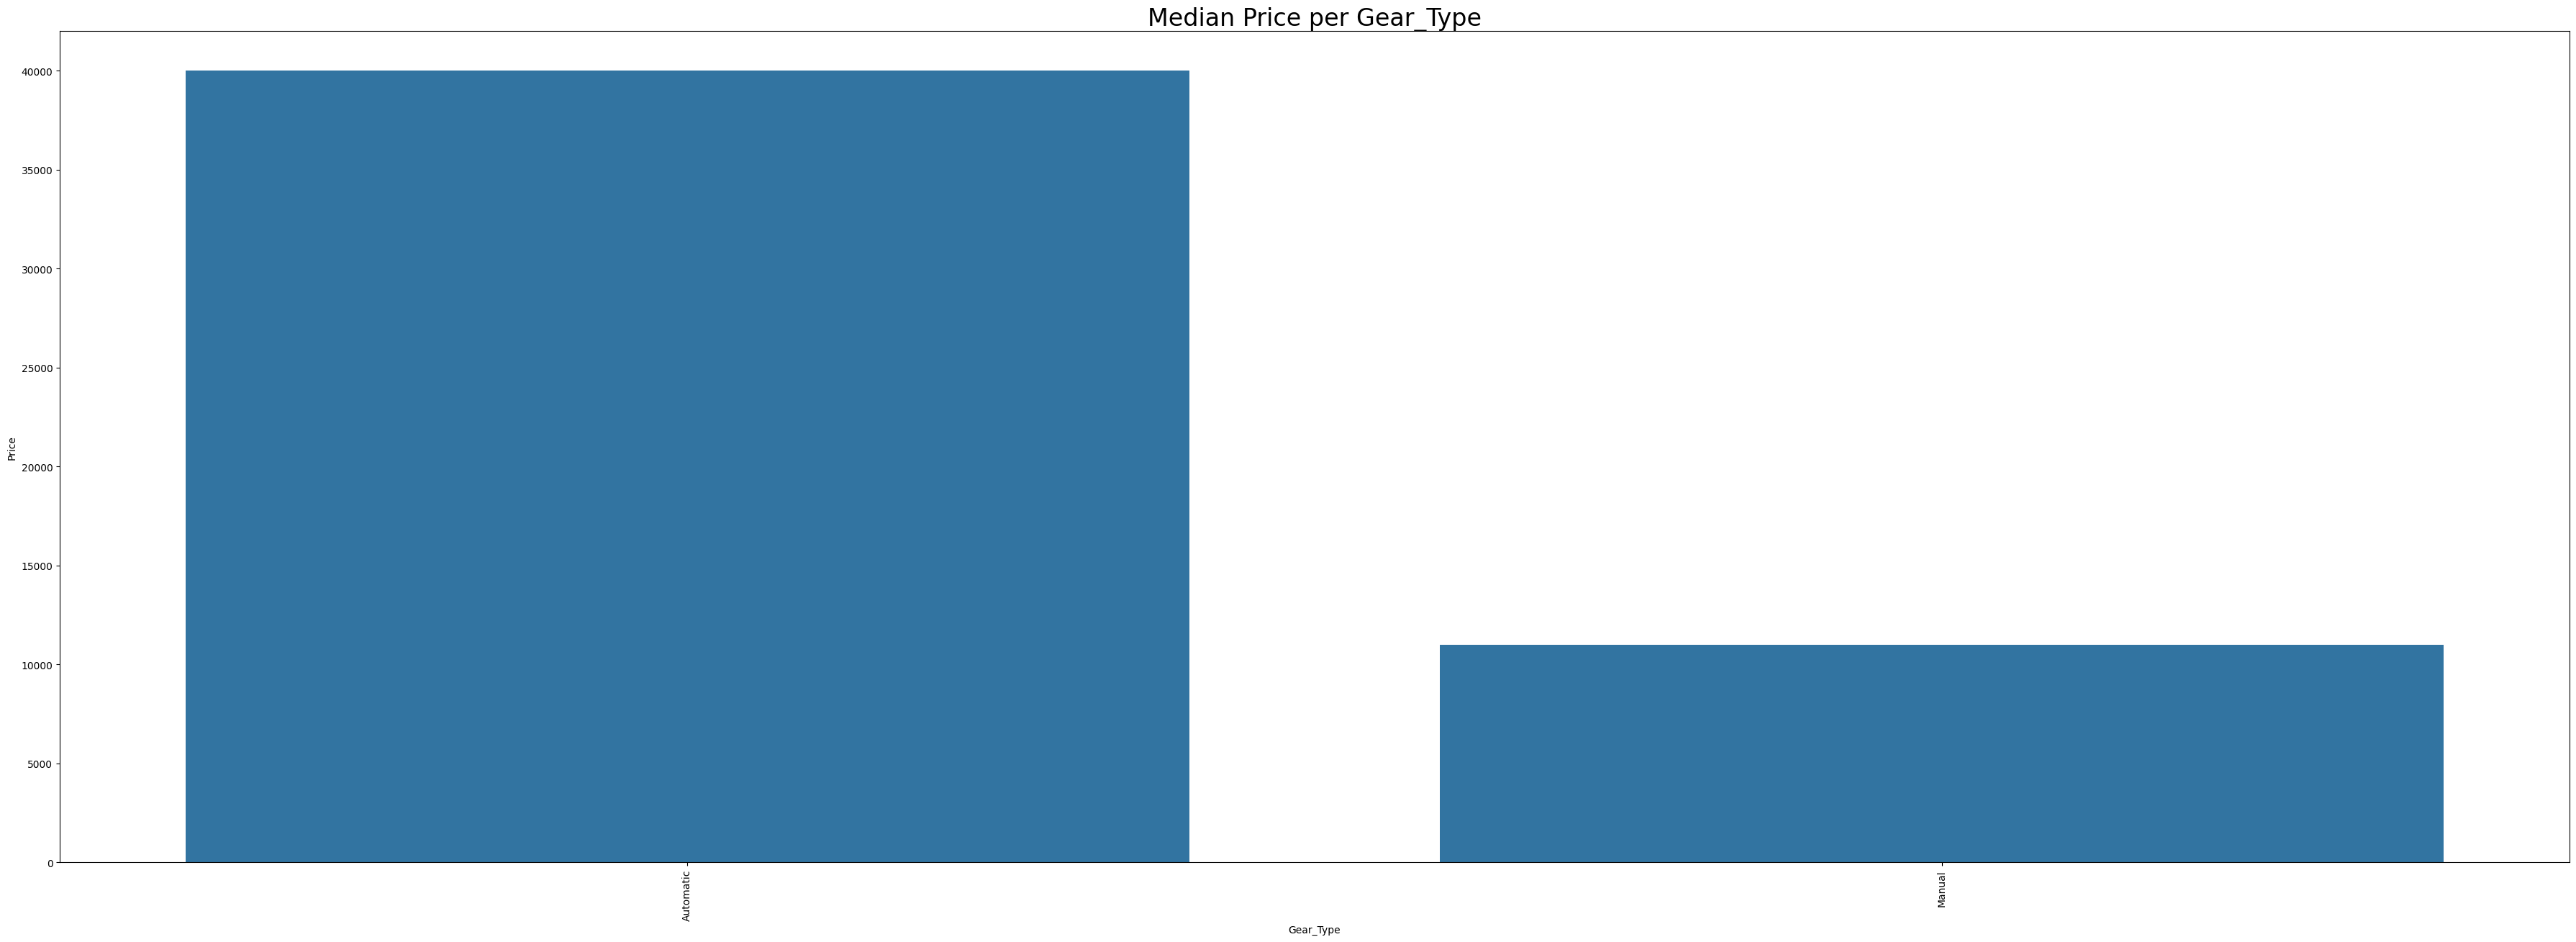

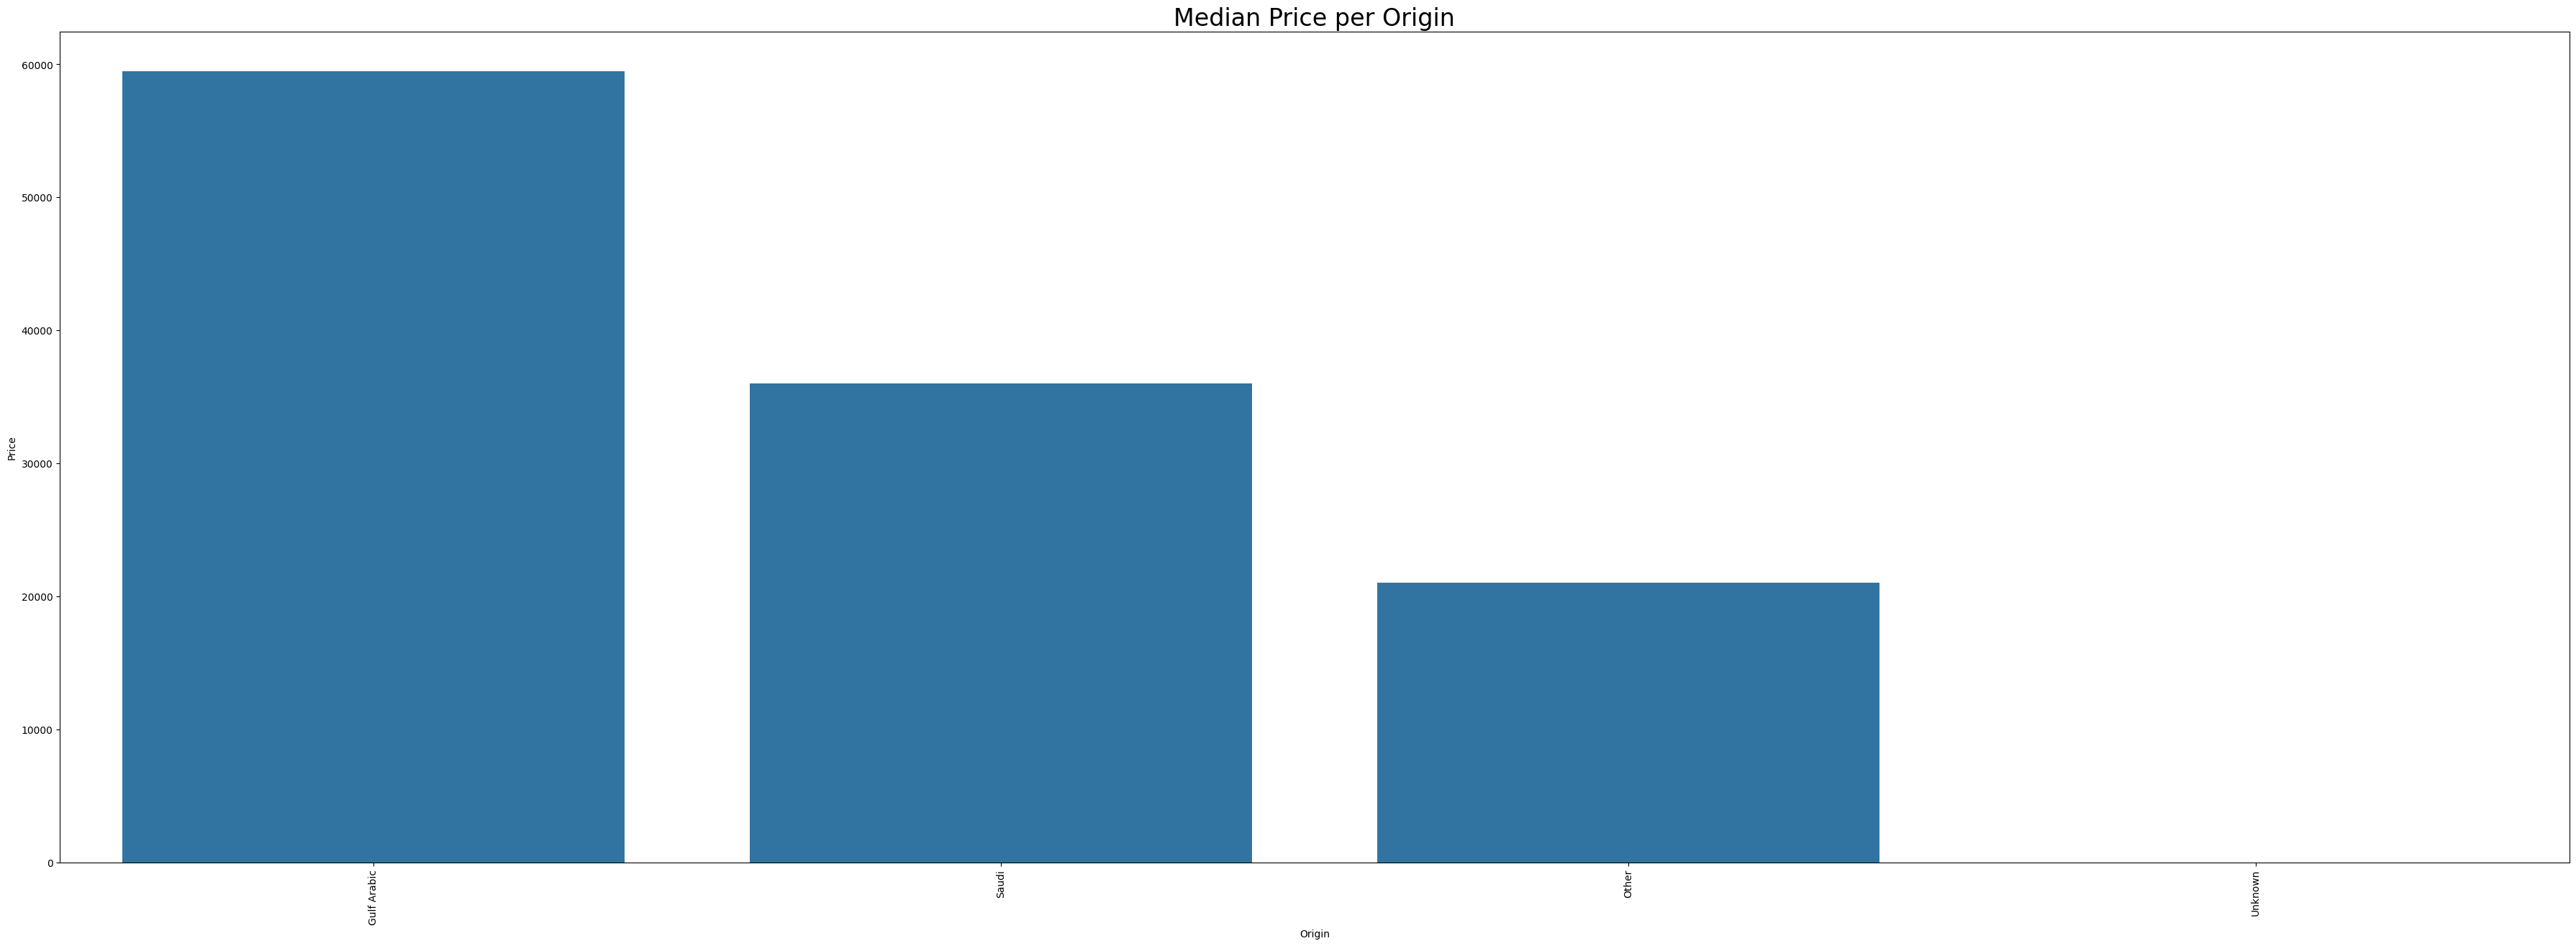

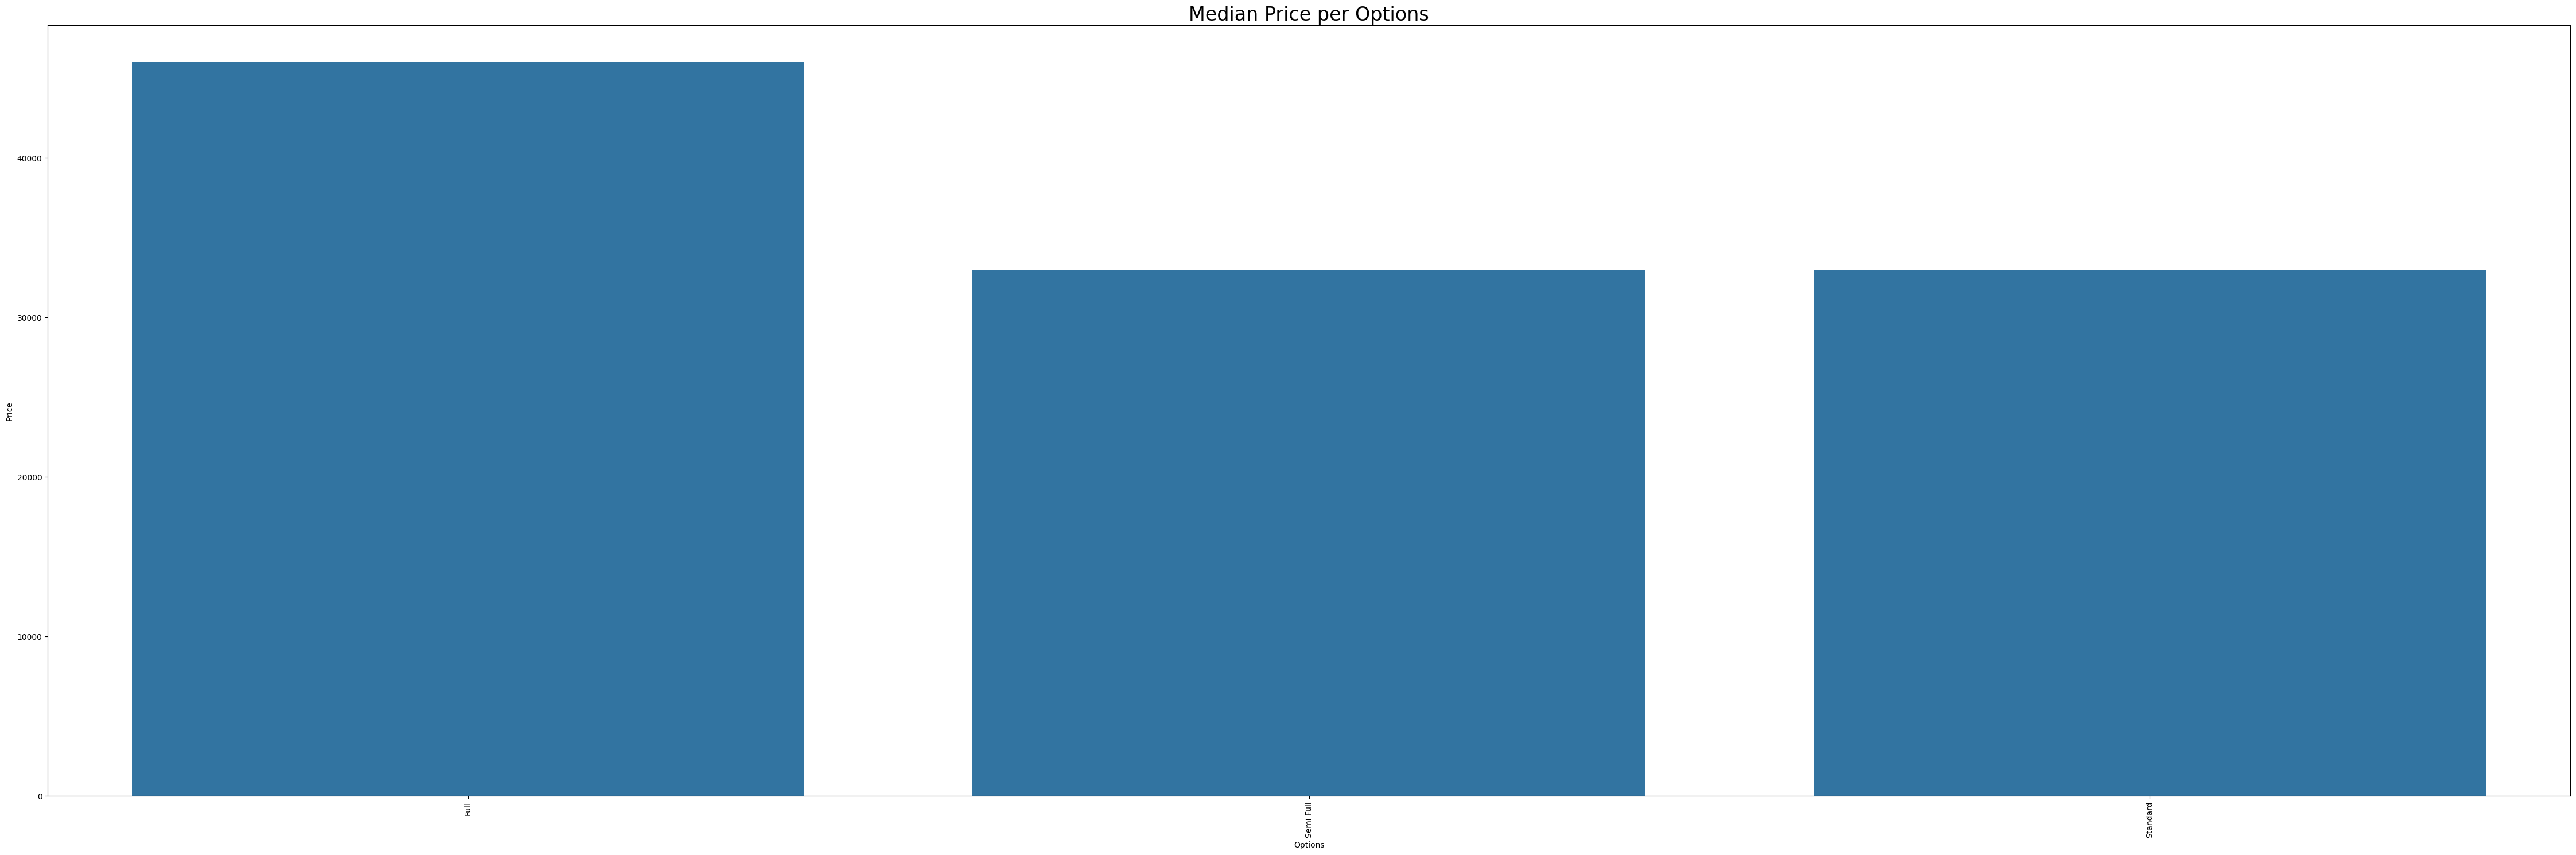

In [14]:
for column in ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']:
    tmp = df.pivot_table(
        index=column,
        values='Price',
        aggfunc='median',
    ).sort_values(by='Price', ascending=False)

    plt.figure(figsize=(45, 15))
    sns.barplot(tmp, x=column, y='Price')
    plt.title(f'Median Price per {column}',size = 24) 
    plt.xticks(rotation=90)
plt.tight_layout()

**Analysis Results:**

- Based on the visualization above, the median price of used cars that are not zero shows a clear variation based on categories such as Type, Region, Make, Gear_Type, Origin, and Options. This indicates that car prices are influenced by these categories, with non-zero median prices differing for each category.

### **b. Data Cleaning**

The Data Exploration process provides an overview of the Data Cleaning that needs to be done. Based on Data Understanding, the data does not contain missing values, but the data contains duplicate rows. In addition, each numeric feature contains potential outliers that need to be handled. Other things that will be done in this Data Cleaning are checking and handling inappropriate values ​​in each feature, as well as checking and handling features that are not suitable for use in modeling.

#### **Handling Duplicate**

Based on previous data understanding, there are duplicate rows representing information about the same cars. Before building a model, it’s essential to remove these duplicates, as they can skew results and lead to inaccurate insights. By eliminating duplicates, the quality of the dataset for modeling can be improved, reducing bias in the analysis.

In [15]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check for any remaining duplicate rows
df.duplicated().sum()

np.int64(0)

At this stage, the duplicate rows have been removed and there are no duplicate rows.

#### **Handling Outliers**

Based on Data Understanding, the following are potential outliers ​​that will be examined and handled.

**Year**

Based on previous data understanding, cars manufactured before 1970 are identified as potential extreme outliers.

In [16]:
# Filter the DataFrame to include only rows where the 'Year' column has a value less than 1970
df[df['Year'] < 1970]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
617,Thunderbird,Riyadh,Ford,Automatic,Other,Full,1965,8.0,25000,True,0
2262,Impala,Al-Ahsa,Chevrolet,Automatic,Other,Full,1964,1.2,100000,False,75000
5012,Other,Riyadh,Ford,Manual,Saudi,Standard,1963,1.0,300,False,22000


Given their small number and their status as extreme potential outliers, the decision has been made to remove these entries from the dataset.

In [17]:
# Filtering the DataFrame df to keep only rows where the year is 1970 or later
df = df[~(df['Year'] < 1970)]

**Mileage**

Based on previous data understanding, mileage greater than 9,000,000 km has been identified as an extreme potential outlier.

In [18]:
# Filter the DataFrame to include only rows where the 'Mileage' column has a value greater than 9,000,000
df[df['Mileage'] > 0.9e7]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1224,POS24,Aseer,Mercedes,Manual,Other,Full,1983,8.0,9999999,True,0
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,False,9000


In the article [“How Responsive Is Saudi New Vehicle Fleet Fuel Economy to Fuel-and Vehicle-Price Policy Levers?”](https://doi.org/10.1016/j.eneco.2020.105026), the annual mileage was assumed to be 16,000 km, based on the average mileage reported for used cars sourced from ksa.motory.com. Given this figure, the mileage of 20,000,000 km for a 2009 car and 9,999,999 km for a 1983 car are clearly unreasonable. These extremely high mileages are most likely due to recording errors, and therefore, they were removed from the dataset.

Furthermore, other vehicles will be evaluated using the same assumptions based on their manufacturing year, with the understanding that the manufacturing year indicates the first year the car was put into use. Each vehicle's mileage will be assessed to determine whether it aligns with the expected annual mileage. If a car's mileage significantly exceeds the expected value based on its age, it will also be flagged for potential removal, ensuring the dataset is suitable for modeling purposes.

In [19]:
# Filtering the DataFrame df to keep only rows where the Year is equal to the maximum Year in the DataFrame
df[df['Year'] == df['Year'].max()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1479,Seven,Jeddah,Changan,Automatic,Saudi,Standard,2022,1.1,2500,True,0
4355,Seven,Al-Ahsa,Changan,Automatic,Saudi,Standard,2022,1.5,460,True,0


The latest car released in 2022 has a maximum mileage of 2,500 km. Assuming an annual mileage of 16,000 km, this indicates that the car has never been used for more than a year, or at most one year. Since there is no information on when the car was first used, the year of manufacture will be assumed to be the first time the car was used. Based on this assumption and the age of the oldest car, the mileage of all cars in the data should be less than the mileage of the oldest car.

In [20]:
# Filtering the DataFrame df to keep only rows where Mileage is not greater than a calculated threshold
df = df[~(df['Mileage'] > (2023 - df['Year']).max() * 16000)]

Cars that do not meet the annual mileage assumptions will be removed from the dataset for modeling. This is important to keep the data accurate and relevant.

**Price**

Based on previous data understanding, price greater than 590,000 SAR has been identified as an extreme potential outlier.

In [21]:
# Filter the DataFrame to include only rows where the 'Price' column has a value greater than 590,000
df[df['Price'] > 5.9e5]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,False,620000
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,False,850000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,False,748000
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,False,599000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,False,800000


Additionally, cars priced at 0 SAR and 1 SAR seem unrealistically cheap. In this data, a price of 0 SAR does not indicate that the car is free, but rather that the price is negotiable. The actual price is determined through negotiation, and this information has not been recorded in the dataset. Therefore, a price of 0 SAR is not relevant for building the model. Furthermore, by removing cars with a price of 0, categories with a median of 0 from the previous Data Understanding phase will not be used, and only categories that influence the price will be considered.

![Pasted Graphic.png](<attachment:Pasted Graphic.png>)

The price of 1 SAR for used cars is considered unreasonable. According to information from [Car Switch](https://ksa.carswitch.com/en/saudi/used-cars/search?sort=price%20ASC), the lowest price for a used car in Saudi Arabia is 10,000 SAR. Therefore, this price will be used as the minimum reasonable price limit for used cars. On the other hand, a price of 590,000 SAR is identified as a potential extreme outlier, with very few cars available in that price range, so it will not be used in model development.
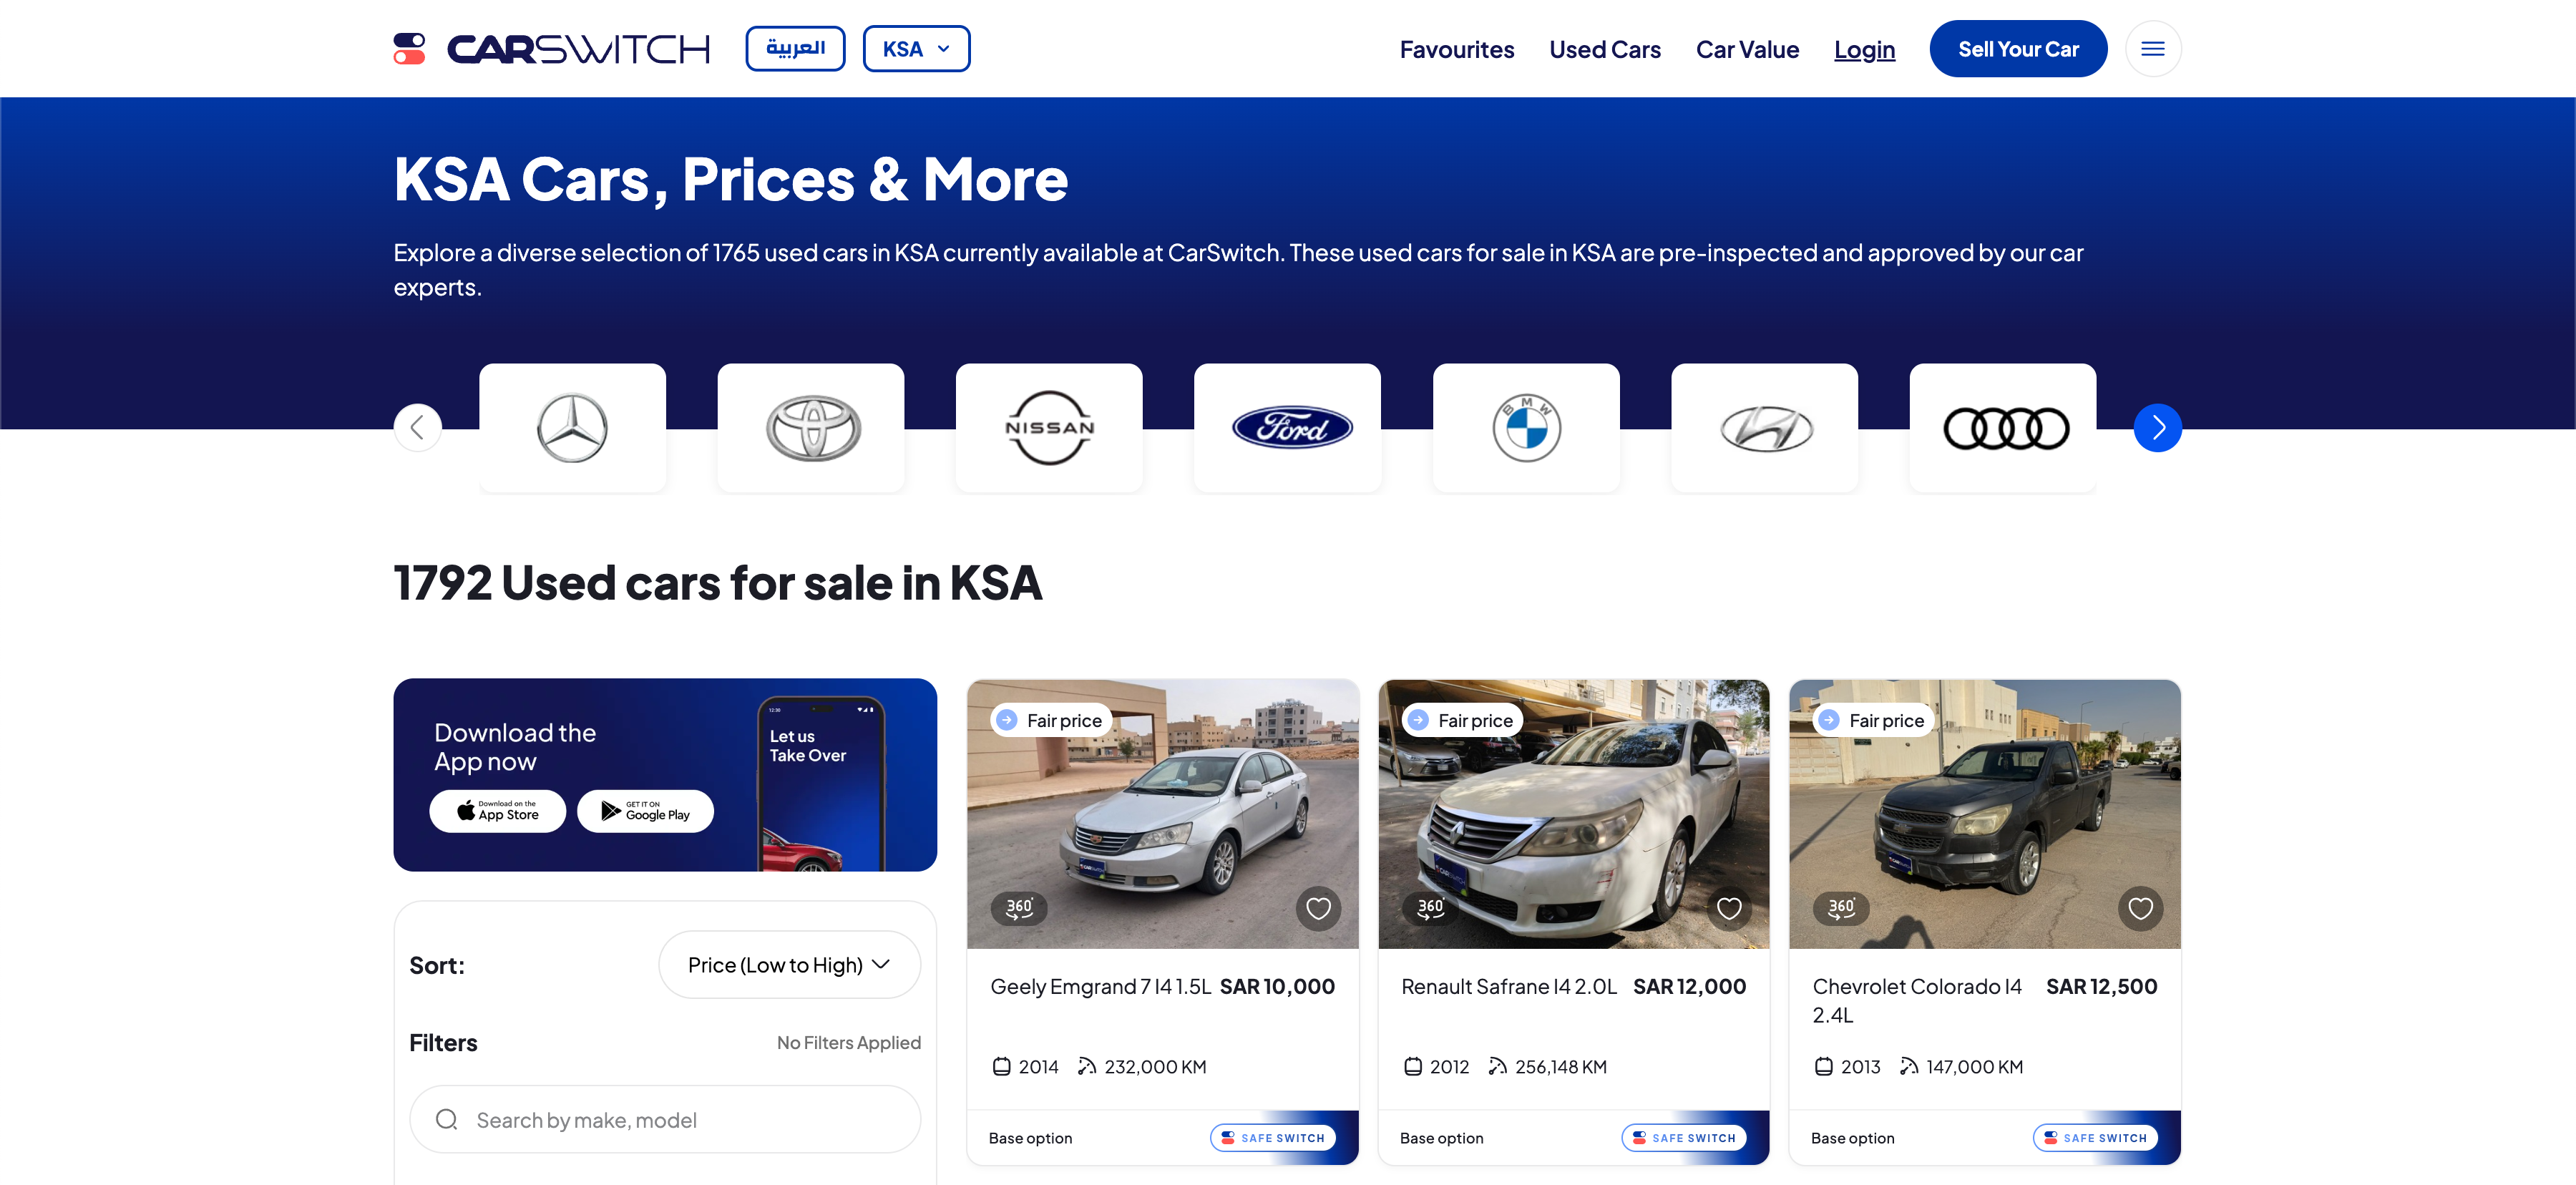

In [22]:
# Filter the DataFrame 'df' to include only rows where the 'Price' column is greater than 10,000
df = df[df['Price'] > 10000]

# Filter the DataFrame 'df' to include only rows where the 'Price' column is less than 590,000
df = df[df['Price'] < 5.9e5]

**Engine Size**

Based on the article in [Carwow](https://www.carwow.co.uk/guides/choosing/what-engine-size-do-i-need-0521#gref), the common engine size for cars typically ranges from 1.0 to 3.0 liters. Engines with a capacity above 3.0 liters are becoming increasingly rare and are usually found in high-performance vehicles. Data analysis indicates that engine sizes over 8 liters are identified as potential outliers, suggesting that most engine sizes do not fall within this range. Considering that engine sizes above 3.0 liters are already rare, data regarding cars with engine sizes above 8 liters will be removed.

In [23]:
# Filter the DataFrame to include only rows where the 'Engine_Size' column has a value greater than 8
df[df['Engine_Size'] > 8]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
59,Camry,Taef,Toyota,Automatic,Saudi,Semi Full,2001,9.0,150000,False,15000
600,G,Riyadh,Mercedes,Automatic,Saudi,Full,2015,8.8,213000,False,240000
650,E,Jeddah,Mercedes,Manual,Other,Semi Full,2017,9.0,134000,False,155000
1227,Dyna,Riyadh,Isuzu,Manual,Saudi,Standard,2003,8.5,330,False,40000
1547,Marquis,Riyadh,Ford,Automatic,Other,Full,2008,9.0,115,False,17000
2217,Camry,Jeddah,Toyota,Automatic,Saudi,Semi Full,2014,9.0,106000,False,36000
3525,FJ,Hail,Toyota,Automatic,Saudi,Full,2014,9.0,308000,False,75000
3848,Range Rover,Jeddah,Land Rover,Automatic,Saudi,Semi Full,2013,8.7,177,False,88000
5251,Sierra,Dammam,GMC,Automatic,Saudi,Full,2021,9.0,100,False,178000


In [24]:
# Remove rows from the DataFrame df where engine size (Engine_Size) is 8 or greater
df = df[df['Engine_Size'] < 8]  # Filter df to only include rows with Engine_Size < 8

### **c. Feature Selection**

Based on the Data Understanding, the Negotiable feature is valued as True when the Price is 0. In the previous stage, unrealistic prices, such as 0, have already been removed. Therefore, the value in the Negotiable feature should only be False.

In [25]:
df['Negotiable'].unique()

array([False])

Since there is only one unique value in the Negotiable feature, it will not influence the Price and can be deleted. This step is appropriate because if the Price is 0, the Negotiable column is not relevant for building the model. If the Price is 0 and the Negotiable column is still used, the model may learn incorrect patterns. This is because the price would be cheaper or even approach zero if Negotiable is True. This pattern is evident from the strong negative correlation between the Negotiable and Price columns in the Data Understanding. Therefore, the Negotiable column and the car data with a price of 0 will be removed.

In [26]:
# Drop the 'Negotiable' column from the DataFrame
df = df.drop(columns='Negotiable')

In the case of numeric features, the relationship between features other than "Negotiable" and "Price" is indeed weak or very weak. However, this relationship only explains the interaction between one feature and the price. We will still use these numeric features to anticipate the possibility of a stronger relationship when combined with other features. For categorical features, all features will be used since there are no categories with a median of 0, meaning all categories have an impact on price.

### **Export Processed Dataset**

At this stage, the data has been processed and cleaned. It is ready to be used to build a Machine Learning model.

In [27]:
# The initial number of data entries is 5624
# Calculate the percentage of missing data based on the initial total of 5624 and print the result
print(f'Percentage of cleaned data: {round((5624 - len(df)) / 5624 * 100, 2)}%')

Percentage of cleaned data: 35.03%


This is the data that will be used to build the Machine Learning model.

In [28]:
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


In [29]:
# Create the info DataFrame
info = pd.DataFrame({
    'type' : df.dtypes,
    'nan' : df.isna().sum(),
    'unique' : df.nunique(),
    'unique value' : df.apply(lambda x: x.unique())
    })

# Display the info DataFrame
info

,type,nan,unique,unique value
Type,object,0,309,"[Range Rover, Optima, CX3, Cayenne S, Sonata, Avalon, C300, Land Cruiser, LS, FJ, Tucson, Pajero, Azera, Focus, 5, Spark, Accent, ML, Corolla, Tahoe, A, Altima, Expedition, Senta fe, Liberty, X, Land Cruiser Pickup, VTC, Malibu, The 5, Patrol, Grand Cherokee, SL, Previa, MKZ, Datsun, Hilux, Yukon, GLC, Edge, 6, Innova, Navara, G80, Carnival, Suburban, Camaro, Accord, Sunny, Taurus, Camry, Elantra, Flex, S, Cerato, Furniture, Land Cruiser 70, 3, Pick up, Charger, H6, Hiace, Fusion, Aveo, CX9, Yaris, Sierra, Durango, CT-S, Sylvian Bus, ES, Navigator, Opirus, The 7, Creta, CS35, The 3, GLE, Sedona, Victoria, Prestige, CLA, Vanquish, Safrane, Cadenza, Silverado, Rio, Maxima, X-Trail, Cruze, C, Seven, Prado, Caprice, Grand Marquis, LX, Impala, QX, Blazer, H1, ...]"
Region,object,0,27,"[Riyadh, Hafar Al-Batin, Abha, Makkah, Dammam, Jeddah, Khobar, Al-Baha, Jazan, Aseer, Al-Medina, Al-Namas, Qassim, Taef, Al-Ahsa, Sabya, Al-Jouf, Yanbu, Najran, Hail, Tabouk, Jubail, Wadi Dawasir, Arar, Besha, Qurayyat, Sakaka]"
Make,object,0,55,"[Land Rover, Kia, Mazda, Porsche, Hyundai, Toyota, Chrysler, Lexus, Mitsubishi, Ford, MG, Chevrolet, Mercedes, Nissan, Jeep, BMW, Lincoln, GMC, Genesis, Honda, Zhengzhou, Dodge, HAVAL, Cadillac, Changan, Aston Martin, Renault, Mercury, INFINITI, Audi, Rolls-Royce, Other, BYD, Volkswagen, Victory Auto, Suzuki, Geely, Isuzu, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Jaguar, Peugeot, Foton, MINI, Škoda, Fiat, Iveco, FAW, Great Wall, Ferrari]"
Gear_Type,object,0,2,"[Automatic, Manual]"
Origin,object,0,4,"[Gulf Arabic, Saudi, Other, Unknown]"
Options,object,0,3,"[Full, Semi Full, Standard]"
Year,int64,0,38,"[2015, 2019, 2012, 2016, 2013, 2011, 2008, 2020, 2018, 2014, 2021, 2017, 2010, 1999, 2007, 2009, 1995, 2006, 2003, 1993, 2005, 1983, 2000, 2004, 1990, 1998, 2001, 1980, 2002, 1997, 1994, 1988, 1991, 1989, 1978, 1985, 1996, 1992]"
Engine_Size,float64,0,60,"[5.0, 2.4, 2.0, 4.8, 3.5, 5.7, 4.6, 4.0, 3.0, 1.6, 1.5, 1.4, 6.2, 2.5, 5.3, 5.4, 3.3, 3.7, 3.6, 4.7, 2.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.9, 3.2, 1.0, 6.0, 2.2, 5.6, 1.1, 2.9, 4.1, 1.7, 1.3, 4.4, 3.4, 6.1, 1.9, 7.5, 4.3, 2.8, 5.8, 2.3, 7.2, 7.0, 6.3, 4.2, 5.2, 6.4, 2.1, 3.1, 6.6, 6.7, 3.9, 4.9, 6.8]"
Mileage,int64,0,1291,"[140000, 220000, 25000, 189000, 155, 110864, 200, 79000, 299000, 17000, 71000, 85000, 74715, 284000, 98000, 3400, 108, 204000, 139240, 296, 105920, 10000, 18500, 292000, 270000, 350000, 247000, 92000, 307801, 62000, 38000, 208000, 11000, 245000, 81000, 156000, 228000, 98100, 182000, 210800, 88000, 82808, 4000, 70000, 115, 91440, 45000, 50100, 35449, 180, 66200, 89000, 349000, 105000, 130000, 212000, 139740, 256, 73000, 866, 216, 148000, 188257, 117000, 211257, 135000, 290000, 43632, 530500, 153000, 126000, 180000, 108000, 122000, 53000, 181000, 13800, 9000, 168000, 86500, 192692, 48000, 38920, 32000, 219000, 102000, 3000, 334000, 34000, 229000, 151000, 201000, 130, 147000, 101732, 145, 9800, 231000, 487100, 92412, ...]"
Price,int64,0,388,"[260000, 42000, 58000, 85000, 48000, 81500, 55000, 145000, 38000, 140000, 200000, 65000, 76000, 32000, 23000, 20000, 45000, 30000, 149000, 179000, 22000, 49500, 52000, 25000, 72000, 105000, 99000, 57000, 110000, 265000, 56500, 90000, 71500, 29000, 62000, 141000, 230000, 225000, 60000, 93000, 68000, 50000, 69000, 121500, 51000, 109000, 47000, 88000, 15000, 142000, 53000, 39000, 78500, 35000, 45500, 33000, 125000, 63000, 80000, 44000, 54000, 37000, 79000, 70000, 81000, 68500, 33500, 14500, 11000, 118000, 36500, 75000, 61500, 44500, 13000, 107000, 102000, 99500, 122000, 14000, 21000, 77000, 100000, 59500, 119000, 38500, 165000, 330000, 72910, 410000, 400000, 35500, 66000, 76500, 27000, 95000, 115000, 26000, 69500, 28500, ...]"


The cleaned data for this modeling will be saved into a new file.

In [30]:
# Save DataFrame to a CSV file
df.to_csv('../data/data_saudi_used_cars_processed.csv', index=False)

The remaining dataset consists of 3654 rows and 10 columns. The columns are: Type, Region, Make, Gear_Type, Origin, Options, Year, Engine_Size, Mileage, and Price. During the cleaning process, it was recorded that 35% of the data was deleted.